================= Checking Missing Values =================
Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

================= Apresentando Outliers =================

Os outliers em Entry-Level são : [250000, 225000] 
Os outliers em Mid-Level são : [450000, 450000, 423000] 
Os outliers em Senior-Level são : [412000, 380000, 405000] 
Os outliers em Executive-Level são : [600000] 
Todos os outliers são: [250000, 225000, 450000, 450000, 423000, 412000, 380000, 405000, 600000]


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-Level,Full-Time,Data Scientist,70000,EUR,79833,DE,No remote Work,DE,L
1,2020,Senior-Level,Full-Time,Machine Learning Scientist,260000,USD,260000,JP,No remote Work,JP,S
2,2020,Senior-Level,Full-Time,Big Data Engineer,85000,GBP,109024,GB,Partially remote,GB,M
3,2020,Mid-Level,Full-Time,Product Data Analyst,20000,USD,20000,HN,No remote Work,HN,S
4,2020,Senior-Level,Full-Time,Machine Learning Engineer,150000,USD,150000,US,Partially remote,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior-Level,Full-Time,Data Engineer,154000,USD,154000,US,Fully remote,US,M
603,2022,Senior-Level,Full-Time,Data Engineer,126000,USD,126000,US,Fully remote,US,M
604,2022,Senior-Level,Full-Time,Data Analyst,129000,USD,129000,US,No remote Work,US,M
605,2022,Senior-Level,Full-Time,Data Analyst,150000,USD,150000,US,Fully remote,US,M


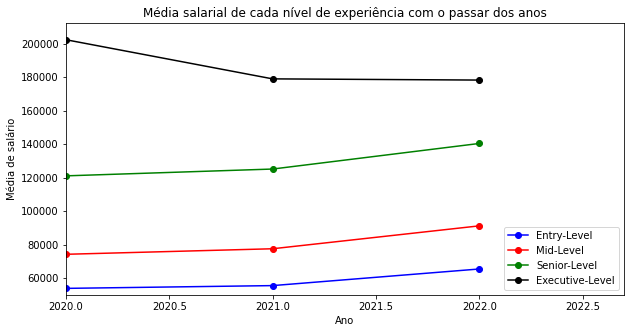

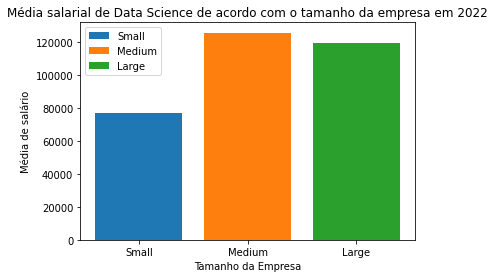

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


#### Importando dados (Importing data) ####
dados = pd.read_csv('ds_salaries.csv',sep=',')
#### Checando se nenhum valor está faltando (Checking missing values) ####
print('================= Checking Missing Values =================')
print(dados.isnull().sum())


#### Identificação de outliers em cada nível de experiência (Identify the outliers on each experience level ) ####
salario_en = []
salario_mi = []
salario_se = []
salario_ex = []
for i in dados['Unnamed: 0']:
    if dados['experience_level'] [i] == 'EN':
        salario_en.append(dados['salary_in_usd'][i])
    elif dados['experience_level'] [i] == 'MI':
        salario_mi.append(dados['salary_in_usd'][i]) 
    elif dados['experience_level'] [i] == 'SE':
        salario_se.append(dados['salary_in_usd'][i])
    elif dados['experience_level'] [i] == 'EX':
        salario_ex.append(dados['salary_in_usd'][i])
     

outliers =[]
outliersgeral=[]

#### Criando função para o outliers  ( Outliers function) ####
def ident_outliers(data,dados):
    corte_dp = 3
    media = np.mean(data)
    dp = np.std(data)
    
    
    for dado in data:
        z_score = (dado-media)/dp
        if np.abs(z_score) >= corte_dp:
            outliers.append(dado)
            outliersgeral.append(dado)
            
            
    return outliers

print('\n================= Apresentando Outliers =================')
outliers_en = ident_outliers(salario_en,dados)
print('\nOs outliers em Entry-Level são : {} '.format(outliers_en))
outliers =[]
outliers_mi = ident_outliers(salario_mi,dados)
print('Os outliers em Mid-Level são : {} '.format(outliers_mi))
outliers =[]
outliers_se = ident_outliers(salario_se,dados)
print('Os outliers em Senior-Level são : {} '.format(outliers_se))
outliers =[]
outliers_ex = ident_outliers(salario_ex,dados)
print('Os outliers em Executive-Level são : {} '.format(outliers_ex))

print('Todos os outliers são: {}'.format(outliersgeral))



#### Mudando as siglas para seus reais valores (Changing the acronyms to their real values) ####
for i in dados['Unnamed: 0']:
    if dados['experience_level'] [i] == 'EN':
        dados.loc[i,'experience_level']= 'Entry-Level'
    elif dados['experience_level'] [i] == 'MI':
        dados.loc[i,'experience_level'] = 'Mid-Level'   
    elif dados['experience_level'] [i] == 'SE':
        dados.loc[i,'experience_level'] = 'Senior-Level'
    else:
        dados.loc[i,'experience_level']= 'Executive-Level'

for i in dados['Unnamed: 0']:
    if dados['employment_type'] [i] == 'PT':
        dados.loc[i,'employment_type']= 'Part-Time'
    elif dados['employment_type'] [i] == 'FT':
        dados.loc[i,'employment_type'] = 'Full-Time'   
    elif dados['employment_type'] [i] == 'CT':
        dados.loc[i,'employment_type'] = 'Contract'
    else:
        dados.loc[i,'employment_type'] = 'Freelance'

for i in dados['Unnamed: 0']:
    if dados['remote_ratio'] [i] == 0:
        dados.loc[i,'remote_ratio']= 'No remote Work'
    elif dados['remote_ratio'] [i] == 50:
        dados.loc[i,'remote_ratio'] = 'Partially remote'   
    else:
        dados.loc[i,'remote_ratio'] = 'Fully remote'
        

#Retirando os outliers para a construção do gráfico
for i in dados['Unnamed: 0']:
    for valor in outliersgeral:
        if dados['salary_in_usd'][i] == valor:
            dados.drop([i],inplace = True)
            break
            
dados = dados.drop(['Unnamed: 0'],axis = 1)
display(dados)
dados.to_excel('Atualizado.xlsx',index = False)


#Pegando valores de cada ano em cada nível de experiência para a montagem do gráfico
lista = dados.values.tolist()
entry2020 = []
mid2020 = []
sen2020 = []
exec2020 = []

entry2021 = []
mid2021 = []
sen2021 = []
exec2021 = []

entry2022 = []
mid2022 = []
sen2022 = []
exec2022 = []
for i in lista:
    if i[0] == 2020:
        if i[1] == 'Entry-Level':
            entry2020.append(i[6])
        elif i[1] == 'Mid-Level':
            mid2020.append(i[6])
        elif i[1] == 'Senior-Level':
            sen2020.append(i[6])
        elif i[1] == 'Executive-Level':
            exec2020.append(i[6])
    elif i[0] == 2021:
        if i[1] == 'Entry-Level':
            entry2021.append(i[6])
        elif i[1] == 'Mid-Level':
            mid2021.append(i[6])
        elif i[1] == 'Senior-Level':
            sen2021.append(i[6])
        elif i[1] == 'Executive-Level':
            exec2021.append(i[6])
    elif i[0] == 2022:
        if i[1] == 'Entry-Level':
            entry2022.append(i[6])
        elif i[1] == 'Mid-Level':
            mid2022.append(i[6])
        elif i[1] == 'Senior-Level':
            sen2022.append(i[6])
        elif i[1] == 'Executive-Level':
            exec2022.append(i[6])

#Calculando a média em cada ano para cada nível de experiência
medentry2020 = np.mean(entry2020)
medmid2020 = np.mean(mid2020)
medsen2020 = np.mean(sen2020)
medexec2020 = np.mean(exec2020)

medentry2021 = np.mean(entry2021)
medmid2021 = np.mean(mid2021)
medsen2021 = np.mean(sen2021)
medexec2021 = np.mean(exec2021)

medentry2022 = np.mean(entry2022)
medmid2022 = np.mean(mid2022)
medsen2022 = np.mean(sen2022)
medexec2022 = np.mean(exec2022)

#Inserindo a média salarial de todos os anos em uma lista
entrygeral = []
entrygeral.append(medentry2020)
entrygeral.append(medentry2021)
entrygeral.append(medentry2022)

midgeral = []
midgeral.append(medmid2020)
midgeral.append(medmid2021)
midgeral.append(medmid2022)


sengeral = []
sengeral.append(medsen2020)
sengeral.append(medsen2021)
sengeral.append(medsen2022)


execgeral = []
execgeral.append(medexec2020)
execgeral.append(medexec2021)
execgeral.append(medexec2022)

#Criando o tamanho das empresas
small2022 = []
medium2022 = []
large2022 = []

for i in lista:
    if i[0] == 2022:
        if i[10] == 'S':
            small2022.append(i[6])
        elif i[10] == 'M':
            medium2022.append(i[6])
        elif i[10] == 'L':
            large2022.append(i[6])
        


small = []
small = np.mean(small2022)
medium = []
medium = np.mean(medium2022)
large = []
large = np.mean(large2022)
tamanho = ['Small','Medium','Large']
anos = [2020,2021,2022]

plt.figure(figsize=(10, 5))
plt.title("Média salarial de cada nível de experiência com o passar dos anos")
plt.plot(anos,entrygeral,c='b',marker = 'o')
plt.plot(anos,midgeral,c='r',marker = 'o')
plt.plot(anos,sengeral,c='g',marker = 'o')
plt.plot(anos,execgeral,c='k',marker = 'o')
plt.legend(['Entry-Level', 'Mid-Level', 'Senior-Level','Executive-Level'], loc=4)
plt.ylabel('Média de salário')
plt.xlabel('Ano')

plt.axis([2020,2022.7,50000,max(execgeral)+10000])
plt.show()
#ax = plt.gca()
#ax.set_xlim( xmin=2020,xmax=2022)




plt.title("Média salarial de Data Science de acordo com o tamanho da empresa em 2022")
plt.bar('Small',small)
plt.bar('Medium',medium)
plt.bar('Large',large)
plt.legend(['Small', 'Medium', 'Large'], loc=2)
plt.ylabel('Média de salário')
plt.xlabel('Tamanho da Empresa')

plt.show()